Trabajo realizado por: Pablo Gamarro Lozano y Cristian Torres Ortega
# Preguntas iniciales
## 1. ¿De qué tratan los datasets y cómo se relacionan entre sí?
Los datasets que se van a utilizar contienen información sobre todos los choques que resultaron en lesiones en la Ciudad de San Francisco, dichos datos se obtienen de numerosas fuentes. 

Los accidentes mortales proceden de la OME (Office of the Chief Medical Examiner) y se incluyen aquellos datos que cumplen el protocolo Vision Zero Fatality de San Francisco (sostenido por varias agencias del públicas como el departamento de policía o el de salud pública de San Francisco entre ellos). Los datos de accidentes con lesiones para los datos anteriores previos al 2013 provienen del SWITRS (Statewide Integrated Transportation Record System). Para los que van del 2013 al 2018 se obtienen del sistema Crossroads Software Traffic Collision Database. Y desde el 2018 hasta la actualidad del Interim Collision System del SFPD (San Francisco Police Department).

Solo se mapean los bloqueos con información geográfica válida. Los choques que ocurren en intersecciones complejas con múltiples caminos se mapean en un solo punto y se excluyen los choques con lesiones y letales que ocurren en las autovías.

Los datasets están relacionados entre sí de forma relacional. En el primero, cada fila representa un accidente; en el segundo, se representan las partes envueltas, es decir, el conductor o conductores, viandantes, ciclistas o coches aparcados envueltos en el accidente; y en el tercero, las víctimas de los accidentes que hayan resultado lesionadas.

Los datasets han sido descargados de los siguientes links:
* [Accidentes](https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx)
* [Partes envueltas](https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury-Parties-Involv/8gtc-pjc6)
* [Victimas](https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury-Victims-Involv/nwes-mmgh)

## 2. ¿Cuál es su tamaño?
El dataset de los accidentes cuenta con 56 columnas y 54.504 filas.
El dataset de las partes envueltas cuenta 81 columnas y 115.723 filas.
El dataset de las víctimas de accidentes cuenta con 89 columnas y 69.303 filas.

## 3. ¿Por qué estos datasets pueden ser de interés para alguien en una empresa o empresa pública?
En el caso de las empresas privadas, como las aseguradoras, utilizar estos datos resultan de vital importancia en la toma de decisiones en los precios de sus tarifas según los perfiles de los accidentados, teniéndo en cuenta su edad, sexo, el coche que conducen por su color, potencia, modelo, etc.

Para empresas públicas estos datos podrían servir para detectar puntos negros y cambiar el control del tráfico mediante radares, reducir la velocidad máxima permitida o añadir semáforos y rotondas.
# Segunda parte
### Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_accidentes = pd.read_csv(
    "data/Traffic_Crashes_Resulting_in_Injury.csv", dtype={4: str, 16: str})
df_accidentes.shape

(54504, 61)

In [3]:
df_parties = pd.read_csv(
    "data/Traffic_Crashes_Resulting_in_Injury__Parties_Involved.csv", dtype={4: str, 16: str})
df_parties.shape

(115723, 86)

In [4]:
df_victims = pd.read_csv(
    "data/Traffic_Crashes_Resulting_in_Injury__Victims_Involved.csv", dtype={4: str, 16: str})
df_parties.shape

(115723, 86)

## 4. ¿Cuál es el porcentaje de accidentes donde los culpables del accidente habían consumido alcohol o drogas?

In [5]:
df_merge = pd.merge(df_accidentes, df_parties, how="inner", on="case_id_pkey")
df_merge["at_fault"].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
df_merge = df_merge[df_merge["at_fault"] == "Yes"]

In [7]:
df_merge.shape

(49358, 146)

### Chequear los valores de las columnas que denotan el estado del culpable

In [8]:
df_merge["party_sobriety"].unique()

array(['Had Not Been Drinking', 'Impairment Not Known',
       'Had Been Drinking, Not Under Influence', 'Not Stated',
       'Had Been Drinking, Impairment Unknown',
       'Had Been Drinking, Under Influence', 'Not Applicable',
       'Sleepy/Fatigued', 'Impairment - Physical', 'Under Drug Influence'],
      dtype=object)

In [9]:
df_merge["party_drug_physical"].unique()

array(['Not Stated', 'Sleepy/Fatigued', 'Not Applicable',
       'Impairment - Physical', 'Under Drug Influence',
       'Suspected Cannabis Use', 'Impairment Not Known'], dtype=object)

### Cálculo de culpables que habían consumido estupefacientes/alcohol

In [10]:
estados_alterados_sobriedad = [
    'Had Been Drinking, Not Under Influence',
    'Had Been Drinking, Impairment Unknown',
    'Had Been Drinking, Under Influence', 'Under Drug Influence']
estados_alterados_drogas = ['Under Drug Influence']


total_parties_drugs = df_merge[np.logical_or(df_merge["party_sobriety"].isin(estados_alterados_sobriedad),
                                             df_merge["party_drug_physical"].isin(estados_alterados_drogas))]["id_x"].count()
total_parties = df_merge["id_x"].count()

print(
    f"Personas que fueron pilladas tras haber consumido estupefacientes/alcohol {total_parties_drugs}\nTotal de personas {total_parties}")

Personas que fueron pilladas tras haber consumido estupefacientes/alcohol 3774
Total de personas 49358


In [11]:
np.logical_or(df_merge["party_sobriety"].isin(estados_alterados_sobriedad),
              df_merge["party_drug_physical"].isin(estados_alterados_drogas)).head()

0     False
4     False
5     False
8     False
12     True
dtype: bool

### Cálculo del número de accidentes en el que los culpables habían consumido estupefacientes/alcohol

In [12]:
df_merge["any_influence"] = np.logical_or(df_merge["party_sobriety"].isin(estados_alterados_sobriedad),
                                          df_merge["party_drug_physical"].isin(estados_alterados_drogas))
gp_merge = df_merge.groupby(["case_id_pkey"])

In [13]:
gp_merge_result = gp_merge[["any_influence"]].agg(lambda x: (
    x.values.any() == True))

In [14]:
print("Accidentes en los que hubo estupefacientes/alcohol involucrados {0}\nAccidentes totales {1}".format(
    gp_merge_result.sum()[0], gp_merge_result.count()[0]))

Accidentes en los que hubo estupefacientes/alcohol involucrados 3742
Accidentes totales 49093


### Cálculo del porcentaje de accidentes en el que los culpables habían consumido estupefacientes/alcohol

In [15]:
print(f"{(gp_merge_result.sum()/gp_merge_result.count()*100)[0]} %")

7.622267940439574 %


In [16]:
gp_merge_result = gp_merge_result.reset_index()
gp_merge_result_int = gp_merge_result.astype({"any_influence": np.int64})

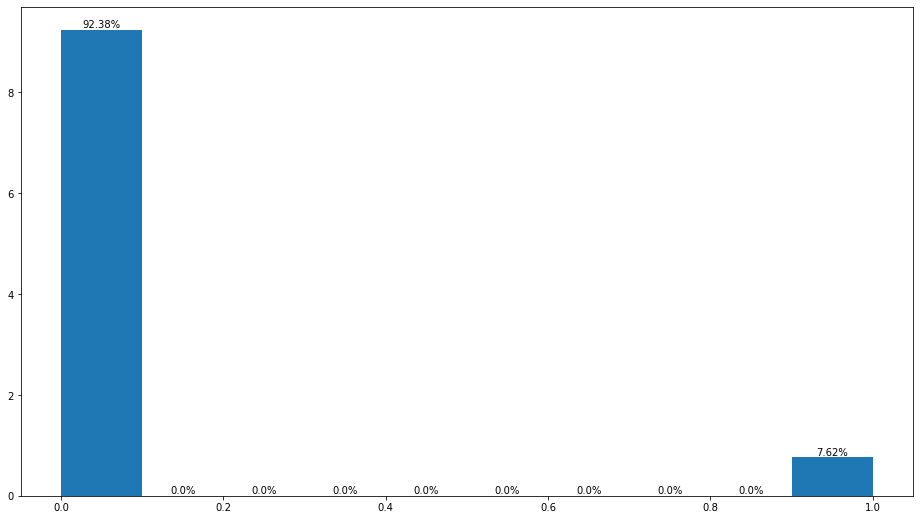

In [17]:
plt.figure(figsize=(16, 9))
n, bins, patches = plt.hist(
    gp_merge_result_int["any_influence"], density=True)

labelstrf = (n*10).round(2)
labelstrf = labelstrf.astype(str)
labelstrf = np.array(list(map(lambda x: x+"%", labelstrf)))
plt.bar_label(patches, labels=labelstrf)

plt.show()

## 5. ¿Cuál es la frecuencia de accidentes por mes?


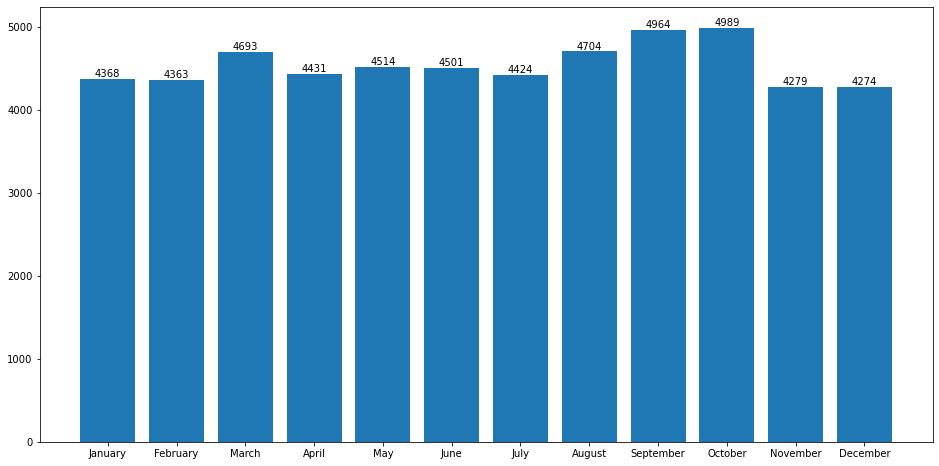

In [18]:
lista_meses = ["January", "February", "March", "April", "May", "June", "July", "August", "September",
               "October", "November", "December"]
accident_frecuencies = df_accidentes['month'].value_counts().reindex(
    index=lista_meses)

plt.figure(figsize=(16, 8))
bar_container = plt.bar(accident_frecuencies.index, accident_frecuencies)
plt.bar_label(bar_container, labels=accident_frecuencies)
plt.show()

## 6. ¿Cómo se reparten los culpables de causar los accidentes según  su edad y sexo?

In [19]:
df_parties["at_fault"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df_guilty_parties = df_parties[df_parties["at_fault"] == "Yes"]
len(df_guilty_parties)

49358

In [21]:
df_guilty_parties["party_age"].describe()

count    43027.000000
mean        40.300672
std         17.419324
min       -970.000000
25%         27.000000
50%         37.000000
75%         52.000000
max        108.000000
Name: party_age, dtype: float64

### Problema: las personas con una edad negativa son un claro fallo al introducir los datos (-970 años). Por lo tanto, se eliminan del dataset.

In [22]:
df_guilty_parties = df_guilty_parties[df_guilty_parties["party_age"] > 0]
df_guilty_parties["party_age"].describe()

count    42979.000000
mean        40.369064
std         16.678458
min          1.000000
25%         27.000000
50%         37.000000
75%         52.000000
max        108.000000
Name: party_age, dtype: float64

In [23]:
df_guilty_parties["party_sex"].value_counts()

Male          29091
Female        13766
Not Stated      116
Other             6
Name: party_sex, dtype: int64

### Separación de edades en intervalos

In [24]:
df_guilty_plot = df_guilty_parties.loc[:, ["party_age", "party_sex"]]
df_guilty_plot["party_age_bin"] = pd.cut(
    df_guilty_plot["party_age"], bins=10)
df_guilty_plot.head()

party_age party_sex party_age_bin
7        33.0      Male  (22.4, 33.1]
8        49.0      Male  (43.8, 54.5]
10       66.0      Male  (65.2, 75.9]
15       22.0      Male  (11.7, 22.4]
33       22.0      Male  (11.7, 22.4]

### Visualización en diagrama de barras apilado

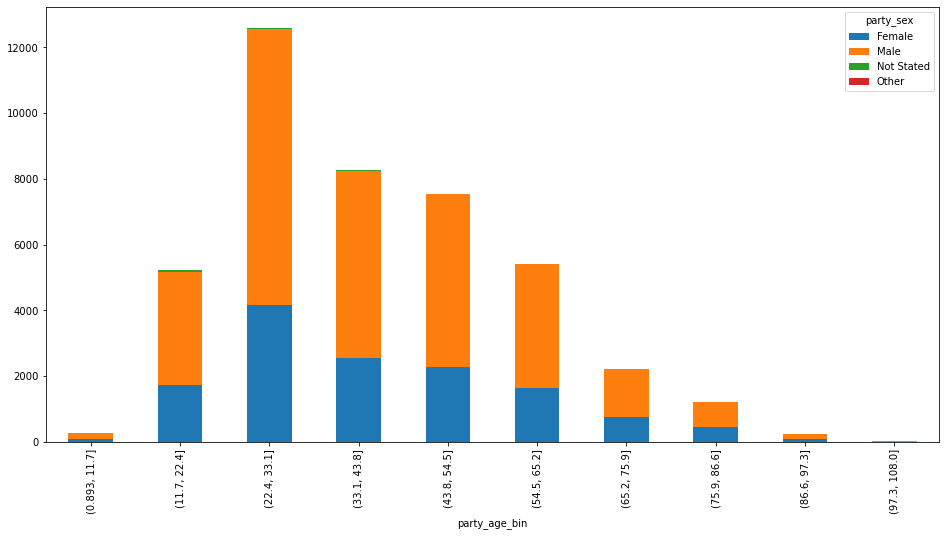

In [25]:
df_guilty_gb = df_guilty_plot.groupby(
    'party_age_bin')['party_sex'].value_counts().unstack()

fig, ax = plt.subplots(figsize=(16, 8))
df_guilty_gb.plot(kind='bar', stacked=True, ax=ax)
plt.show()

## 7. ¿Entre qué edades se reparten el conjunto total de víctimas? 
### Problema con los datos, existen personas con -945 y 1830 años. Se limpian.

In [26]:
df_victims["victim_age"].describe()

count    67629.000000
mean        39.396842
std         20.113050
min       -945.000000
25%         26.000000
50%         36.000000
75%         51.000000
max       1830.000000
Name: victim_age, dtype: float64

<AxesSubplot:>

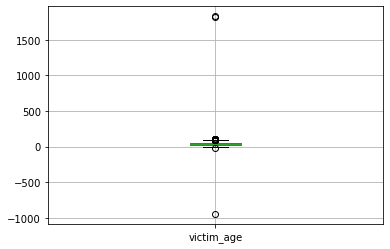

In [27]:
df_victims[["victim_age"]].boxplot()

<AxesSubplot:>

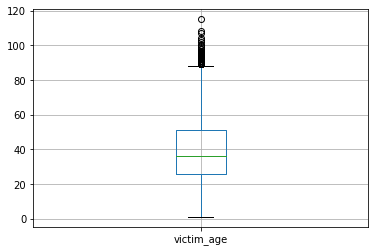

In [28]:
df_victims_q4 = df_victims[(df_victims["victim_age"]
                           > 0) & (df_victims["victim_age"] < 150)]
df_victims_q4[["victim_age"]].boxplot()

In [29]:
df_victims_q4["victim_age"].describe()

count    67538.000000
mean        39.410302
std         17.149018
min          1.000000
25%         26.000000
50%         36.000000
75%         51.000000
max        115.000000
Name: victim_age, dtype: float64

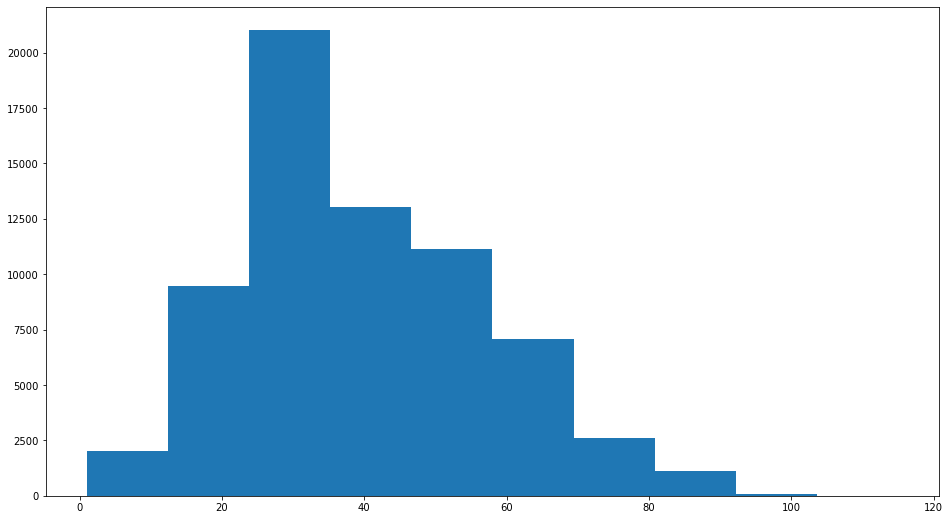

In [30]:
plt.figure(figsize=(16, 9))
plt.hist(df_victims_q4["victim_age"])
plt.show()